<center> <h1> Proyecto final </h1> </center>

## Entrenamiento y optimización de modelos de Machine Learning - 28/07/2023
### Comisión 32845

* **Docente:** David Bustos Usta
* **Tutor:** Anahí García
* **Alumno:** Carlos Alarcón Villegas

**Liberías importadas**

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer


## Predicción de un derrame cerebral

Un **derrame cerebral** ocurre cuando se interrumpe el flujo sanguíneo al cerebro. Pocos minutos después, que se produce un derrame cerebral, las **células del cerebro comienzan a morir** lo que puede causar daños a largo plazo. 

<br>

**A continuación, algunos datos proporcionados por la Organización Mundial de la Salud:**
* A nivel mundial, aproximadamente 1 de cada 6 personas experimentará un derrame cerebral en algún momento de su vida. 
* Cada año, 15 millones de personas lo experimentan y 6 millones de personas no sobreviven. 
* La mayoría de las personas que sufren un derrame cerebral quedan con discapacidades residuales.

<br>

Los factores de riesgo son comportamientos o rasgos que hacen más propenso a desarrollar una enfermedad o afección. Muchos de los factores de riesgo pueden ser tratados, modificados o controlados. Sin embargo, algunos factores de reisgo para el derrame cerebral no pueden ser cambiados. 

<br>

El factor principal de riesgo relacionado con el derrame cerebral que puede ser tratado es la presión arterial. La presión arterial alta no causa signos ni síntomas, por eso es importante tomarsela regularmente. 

<br>

La diabetes aumenta el riesgo de accidente, especialmente para derrames cerebrales debido al daño de pequeños vasos sanguíneos. Contemplaremos tres escenarios de acuerdo con el nivel de azúcar en la sangre: 
1. Valores menores a 99 mg/dl son normales.
2. Valores entre 100 a 125 mg/dl indican que el individuo tiene pre-diabetes.
3. Valores mayores a 126 mg/dl indican que tiene diabetes. 

<br>

Por otro lado, haremos foco en la edad de las personas, ya que individuos de 50 años o mayores corren un riesgo más alto de sufrir un accidente cerebrovascular que las personas más jóvenes. 


### Objetivo:
El objetivo de este estudio es analizar las causas de los accidentes cerebrovasculares en las personas y evaluar la viabilidad de detectar con precisión un posible derrame utilizando técnicas de aprendizaje automático.

### Preguntas a responder:

**1.** ¿Existe una diferencia en la incidencia de derrames cerebrales entre hombres y mujeres?

**2.** ¿La edad influye en la probabilidad de sufrir un accidente cerebrovascular? ¿Cómo se distribuye esta relación?

**3.** ¿Es la hipertensión una causa?

**4.** ¿Es más probable que una persona con enfermedades del corazón sufra un derrame cerebral?

**5.** ¿El índice de masa corporal y los niveles de glucosa en una persona "disparan" la ocurrencia de los derrames cerebrales?

**6.** ¿Las personas que fuman tienen más probabilidades de sufrir un derrame cerebral?

### Fuente del dataset:
* https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Carga del archivo

In [3]:
df_derrame = pd.read_excel('C:\\Users\\Toti\\Datasets/Stroke Prediction Dataset.xlsx')
df_derrame = df_derrame.sort_values(by='id')
df_derrame= df_derrame.set_index("id")

<center> <h2> Análisis Exploratorio de Datos (EDA) </h2> </center>

**Validamos la carga del archivo mediante la impresión de las primeras 5 filas**

In [4]:
df_derrame.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
67,Female,17,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
84,Male,55,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
91,Female,42,0,0,No,Private,Urban,98.53,18.5,never smoked,0
99,Female,31,0,0,No,Private,Urban,108.89,52.3,Unknown,0


* En nuestro conjunto de datos, tenemos **variables númericas y categóricas.**
* La variable objetivo está codificada como 1 para casos positivos (padeció un derrame cerebral) y 0 para casos negativos (no tuvo un derrame)

**Se genera un Shape para validar las dimensiones del DataSet**

In [5]:
df_derrame.shape

(5110, 11)

**Validamos las columnas y el tipo de formato de cada columna**

In [6]:
df_derrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 67 to 72940
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 479.1+ KB


### Comprobación de datos faltantes:

In [7]:
contador_faltantes = df_derrame.isna().sum()

celdas = np.product(df_derrame.shape)
faltantes_totales = contador_faltantes.sum()
porcentaje_faltantes = (faltantes_totales / celdas) * 100
porcentaje_faltantes = round (porcentaje_faltantes,4)

print("El porcentaje de datos faltantes en el conjunto de datos es: {}%".format(porcentaje_faltantes))

El porcentaje de datos faltantes en el conjunto de datos es: 0.3576%


En el conjunto de datos, se han identificado datos faltantes en la columna "bmi" (índice de masa corporal). Para solucionar este problema, se ha decidido completar los valores faltantes con el valor promedio de dicha columna. 

In [8]:
df_derrame['bmi'].fillna(df_derrame['bmi'].mean(), inplace=True)

### Data cleansing:

* **Edades superiores a los 100 años:**

In [9]:
df_derrame = df_derrame [df_derrame ['age'] <= 100]
#Se eliminan aquellas filas en donde la edad supere los 100 años.
#En total, fueron 60 filas. Cabe destacar que inicialmente, la máxima edad 
#registrada era 180 años. 

* **Sexo "Other":**

In [10]:
df_derrame = df_derrame [df_derrame ['gender'] != "Other"]
#Sólo se tenía un registro. Probablemente un error en la carga.

### Descripción de las variables númericas:

In [11]:
df_derrame.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000
mean,44.127550,0.098633,0.054664,106.301921,29.007044,0.049119
std,22.005545,0.298199,0.227346,45.423345,7.664200,0.216137
min,1.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,26.000000,0.000000,0.000000,77.320000,24.000000,0.000000
50%,45.000000,0.000000,0.000000,91.930000,28.500000,0.000000
75%,61.000000,0.000000,0.000000,114.180000,32.900000,0.000000
max,88.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Correlación entre factores:

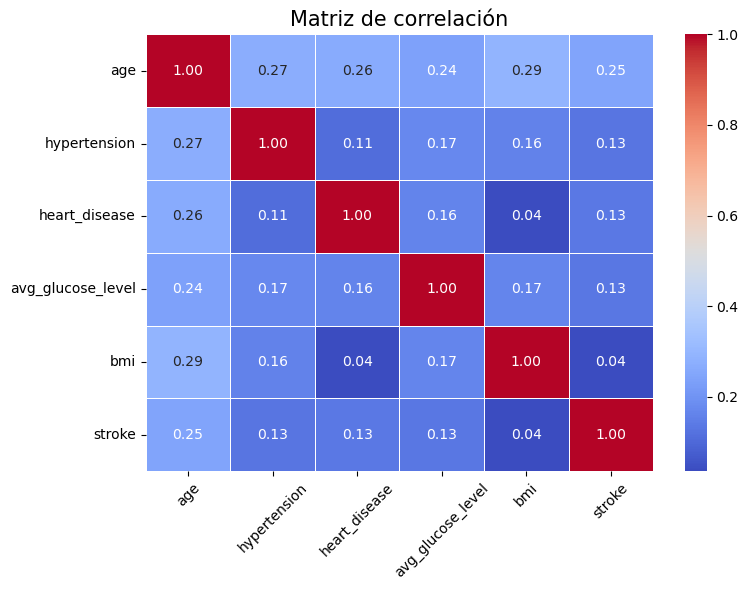

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_derrame.corr(), annot=True, linewidths=0.5, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de correlación', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


No se observa una correlación significativa entre las variables independientes

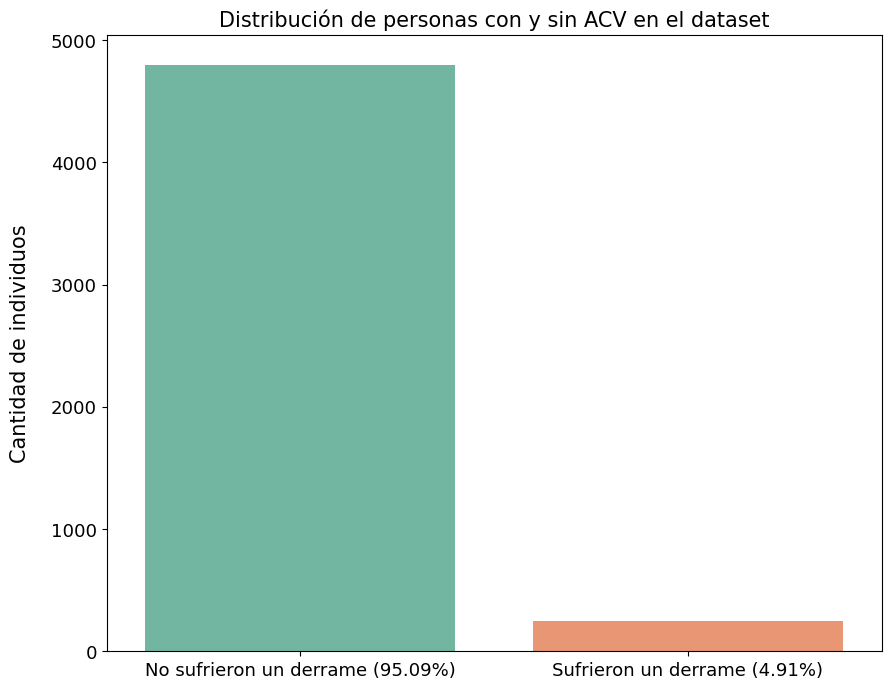

En sintesís:

248 de 5049 tuvo un derrame cerebral, es decir un 4.91%
4801 de 5049 no tuvo un derrame cerebral, es decir un 95.09%


In [13]:
derrame = df_derrame['stroke'].value_counts(normalize=False, sort=True, ascending=False, bins=None)[1]
sin_derrame = df_derrame['stroke'].value_counts(normalize=False, sort=True, ascending=False, bins=None)[0]

porcentaje_derrame = (derrame / df_derrame.shape[0] * 100)
porcentaje_sin_derrame = (sin_derrame / df_derrame.shape[0] * 100)

plt.figure(figsize=(10, 8))
sns.countplot(x='stroke', data=df_derrame, palette="Set2")

plt.title('Distribución de personas con y sin ACV en el dataset', fontsize=15)
plt.ylabel('Cantidad de individuos', size=15, labelpad=15)
plt.xticks((0, 1), ['No sufrieron un derrame ({0:.2f}%)'.format(porcentaje_sin_derrame), 'Sufrieron un derrame ({0:.2f}%)'.format(porcentaje_derrame)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.xlabel('')

plt.show()

print ("En sintesís:")
print ("")
print('{} de {} tuvo un derrame cerebral, es decir un {:.2f}%'.format(derrame, df_derrame.shape[0], porcentaje_derrame))
print('{} de {} no tuvo un derrame cerebral, es decir un {:.2f}%'.format(sin_derrame, df_derrame.shape[0], porcentaje_sin_derrame))


A partir de esto último, se evidencia que el conjunto de datos está desequilibrado, donde la clase positiva resulta ser la clase minoritaria.

Es por ello, que emplearemos alguna técnica de sobremuestreo a futuro para abordar el desequilibrio de clases y mejorar la capacidad del modelo para detectar patrones en la clase minoritaria.

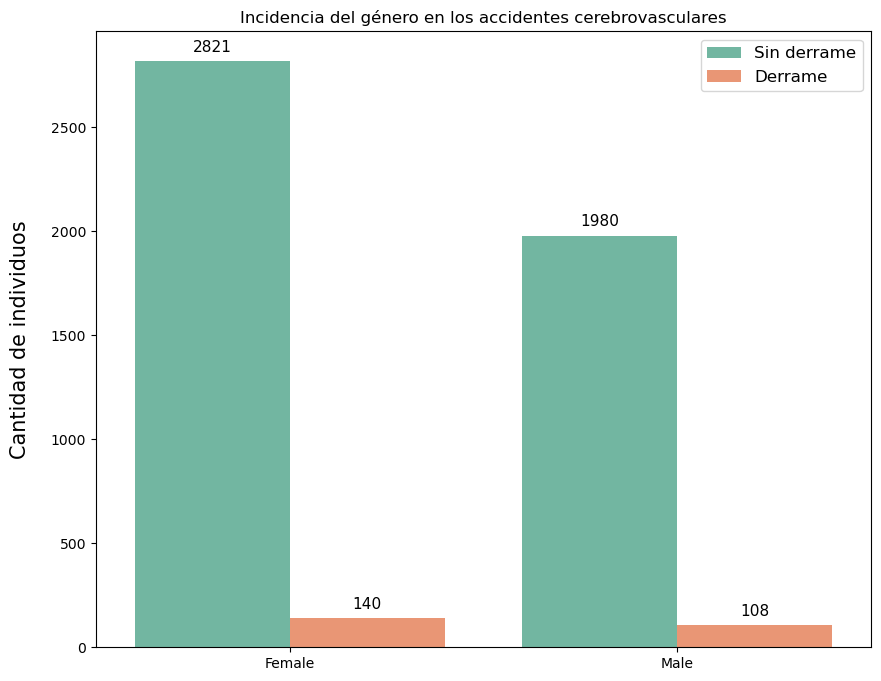

In [14]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_derrame, x="gender", hue="stroke", palette="Set2")

plt.xlabel('', size=15, labelpad=15)
plt.ylabel('Cantidad de individuos', size=15, labelpad=15)
plt.legend(['Sin derrame', 'Derrame'], loc='upper right', prop={'size': 12})

plt.title("Incidencia del género en los accidentes cerebrovasculares")
ax = plt.gca()
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x()
    y = height + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.01  
    ax.text(x + width / 2, y, f"{height}", ha='center', va='bottom', fontsize=11)

plt.show()



| Género | Padecieron un derrame | No han tenido un derrame | Registros totales|
|-|----------|----------|----------|
| **Masculino** | 108 (5,17%) | 1980 (94,83%) | 2088 |
| **Femenino** | 140 (4,73%) |2821 (95,27%) | 2961 |


Es importante tener en cuenta que **estos datos reflejan una muestra específica** y no representan necesariamente la incidencia de derrames en la población general. Para obtener conclusiones más sólidas y precisas, se necesitaría realizar estudios más extensos y representativos, ó bien apoyarse en otras fuentes.

En términos porcentuales, podemos ver que el 5.17% de los hombres han padecido un derrame, mientras que el 4.73% de las mujeres han experimentado un derrame. Se puede notar que **la incidencia de derrames parece ser ligeramente mayor en hombres que en mujeres.**

Según **The Texas Heart Institute, el accidente cerebrovascular es más común en los hombres** (https://www.texasheart.org/heart-health/womens-heart-health/straight-talk-newsletter/el-accidente-cerebrovascular-es-mas-comun-en-los-hombres-y-mas-mortal-en-las-mujeres/), lo cual **respalda en cierta medida los datos encontrados en la muestra**.


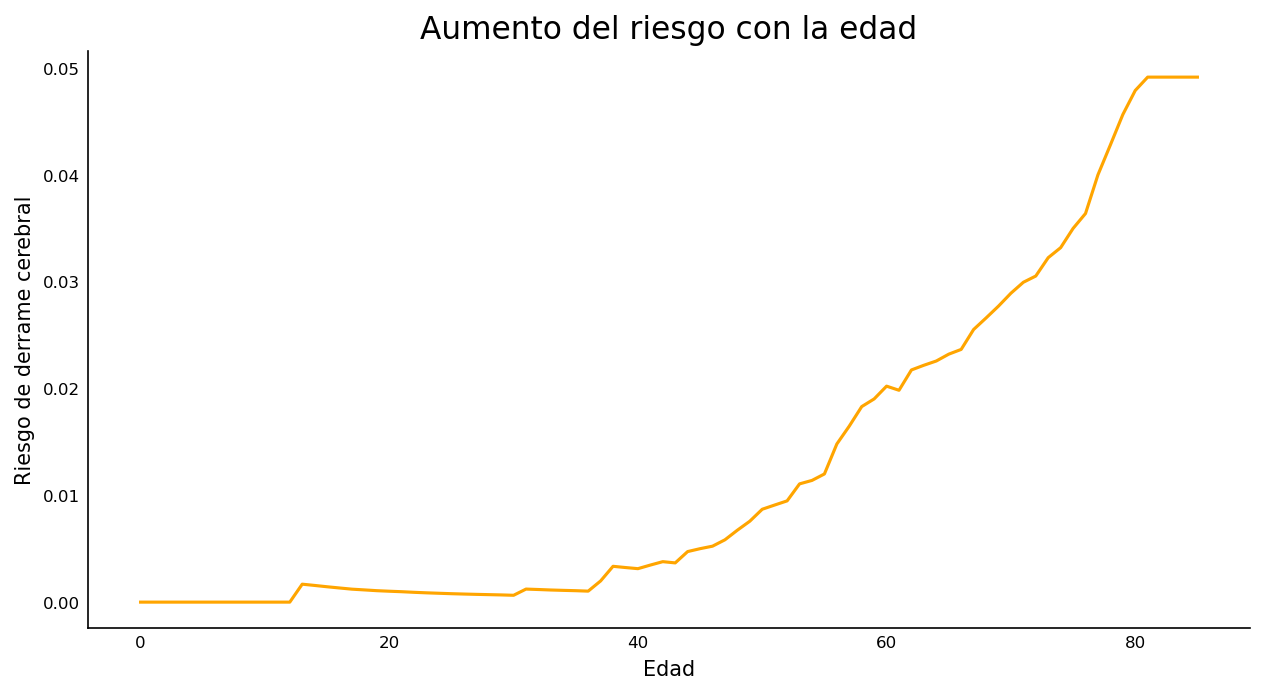

In [15]:
df_derrame['age'] = df_derrame['age'].astype(int)

rate = []
for i in range(df_derrame['age'].min(), df_derrame['age'].max()):
    num_cases = len(df_derrame[df_derrame['age'] < i]['stroke'])
    if num_cases > 0:
        rate.append(df_derrame[df_derrame['age'] < i]['stroke'].sum() / num_cases)

fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
sns.lineplot(data=rate, color="orange", palette="Set2", ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis=u'both', which=u'both', length=0)

ax.set_xlabel('Edad')
ax.set_ylabel('Riesgo de derrame cerebral')

ax.set_title('Aumento del riesgo con la edad', fontsize=15)
plt.show()

A medida que la edad aumenta, se observa un incremento en el porcentaje de personas que han experimentado un derrame cerebral. **Esta tendencia respalda y valida la premisa inicial de que los individuos de 50 años o mayores tienen un riesgo más elevado de sufrir un accidente cerebrovascular.**

Es importante destacar que al analizar los resultados, se observan valores de riesgo en el eje "y" relativamente bajos. Esta discrepancia se debe a que el conjunto de datos utilizado para el análisis está altamente desequilibrado. Dicho desequilibrio puede afectar la representación de los riesgos reales asociados con los derrames cerebrales en diferentes grupos de edad. Es necesario considerar esta limitación al interpretar los resultados obtenidos.


In [16]:
df_derrame_2 = df_derrame.copy()

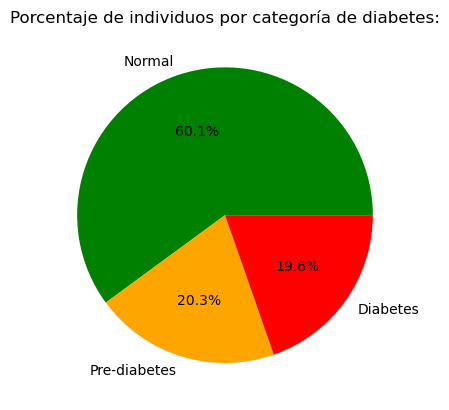

Cantidad de individuos con nivel promedio de glucosa normal:  3033

Cantidad de individuos con pre-diabetes:  1024

Cantidad de individuos con diabetes:  992


In [17]:
df_derrame_2['Categoría diabetes'] = pd.cut(df_derrame['avg_glucose_level'], 
                               bins=[0, 99, 125, 300], 
                               labels=['Normal', 'Pre-diabetes', 'Diabetes'])

d = df_derrame_2.groupby('Categoría diabetes')['avg_glucose_level'].size()/len(df_derrame)*100

colores = ['green', 'orange', 'red']
plt.pie(d, labels=d.index, autopct='%1.1f%%', colors=colores)
plt.title('Porcentaje de individuos por categoría de diabetes:')
plt.show()

print("Cantidad de individuos con nivel promedio de glucosa normal: ", (df_derrame_2['Categoría diabetes'] == 'Normal').sum())
print ("")
print("Cantidad de individuos con pre-diabetes: ", (df_derrame_2['Categoría diabetes'] == 'Pre-diabetes').sum())
print ("")
print("Cantidad de individuos con diabetes: ", (df_derrame_2['Categoría diabetes'] == 'Diabetes').sum())

| Categoría diabetes | Padecieron un derrame | No han tenido un derrame | Total |
|-|----------|----------| |
| **Normal** | 110 | 2923 | 3033|
| **Pre-diabetes** | 38 |986 | 1024|
| **Diabetes** | 100 |892|992|
|              |     |  |   |
| **Muestra** | 248 |4801|5049|

La categoría de **"Diabetes"** presenta una **proporción más alta de pacientes afectados.**

Dado que los derrames cerebrales están estrechamente relacionados con factores de riesgo cardiovascular, **la presencia de diabetes puede aumentar la posibilidad de desarrollar esta complicación.** 

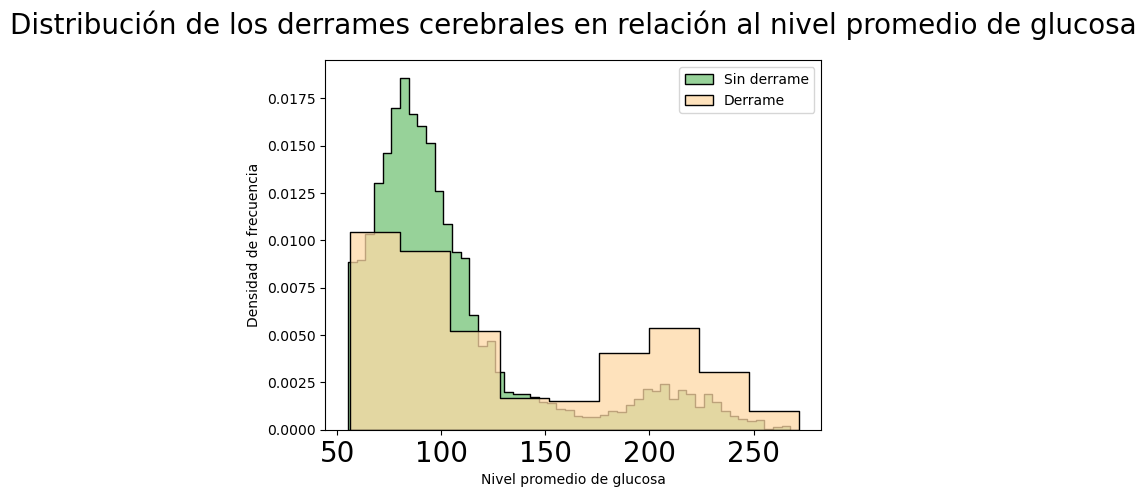

In [18]:
stroke = df_derrame['stroke'] == 1

sns.histplot(data=df_derrame[~stroke], x='avg_glucose_level', 
             hue='stroke', multiple='stack', element='step', 
             stat='density', common_norm=False, 
             kde_kws={'label': 'Not Stroke'}, palette = 'Greens_r')

sns.histplot(data=df_derrame[stroke], x='avg_glucose_level', 
             hue='stroke', multiple='stack', element='step', 
             stat='density', common_norm=False, 
             kde_kws={'label': 'Stroke'}, palette = 'Pastel1_r')

plt.xlabel('Nivel promedio de glucosa')
plt.ylabel('Densidad de frecuencia')
plt.tick_params(axis='x', labelsize=20)
plt.legend(['Sin derrame','Derrame'],loc='upper right', prop={'size': 10})
plt.title('Distribución de los derrames cerebrales en relación al nivel promedio de glucosa', 
          size=20, y=1.05)

plt.show()

**A medida que aumenta el nivel promedio de glucosa**, se puede observar **mayor registro de individuos que han sufrido un derrame cerebral** en comparación de aquellos que no lo han padecido.

<center> <h3> Categorías básicas - Índice de masa corporal </h3> </center>

| Categoría | BMI (kg/m^2)| 
|----------|----------| 
| Bajo peso (delgadez severa) | < 16.0 | 
| Bajo peso (delgadez moderada)| 16.0 – 16.9|
| Bajo peso (delgadez leve)| 17.0 – 18.4 | 
| Rango normal | 18.5 – 24.9 | 
| Sobrepeso (pre-obesidad) | 	25.0 – 29.9 | 
| Obesidad (clase I)| 30.0 – 34.9 | 
| Obesidad (clase II)| 35.0 – 39.9 | 
| Obesidad (clase III)| ≥ 40.0 | 

<br>
<center> Fuente: https://en.wikipedia.org/wiki/Body_mass_index </center>


In [19]:
#Añadimos una nueva colunna que referencia a las clasifiaciones posibles de
#acuerdo con el BMI
def clasificacion (bmi):
    if bmi < 16.0:
        return "Bajo peso (delgadez severa)"
    elif bmi >= 16.0 and bmi <= 16.9:
        return "Bajo peso (delgadez moderada)"
    elif bmi >= 17.0 and bmi <= 18.4:
        return "Bajo peso (delgadez leve)"
    elif bmi >= 18.5 and bmi <= 24.9:
        return "Rango normal"
    elif bmi >= 25.0 and bmi <= 29.9:
        return "Sobrepeso (pre-obesidad)"
    elif bmi >= 30.0 and bmi <= 34.9:
        return "Obesidad (clase I)"
    elif bmi >= 35.0 and bmi <= 39.9:
        return "Obesidad (clase II)"
    else:
        return "Obesidad (clase III)"

df_derrame_2["Clasificación BMI"] = df_derrame_2["bmi"].apply(clasificacion)

contador = df_derrame_2["Clasificación BMI"].value_counts()
contador_dicc = contador.to_dict()

for i, j in contador_dicc.items():
    print("La categoría", i , "tiene", j, "personas")


La categoría Sobrepeso (pre-obesidad) tiene 1606 personas
La categoría Rango normal tiene 1206 personas
La categoría Obesidad (clase I) tiene 1000 personas
La categoría Obesidad (clase II) tiene 506 personas
La categoría Obesidad (clase III) tiene 414 personas
La categoría Bajo peso (delgadez leve) tiene 158 personas
La categoría Bajo peso (delgadez moderada) tiene 81 personas
La categoría Bajo peso (delgadez severa) tiene 78 personas


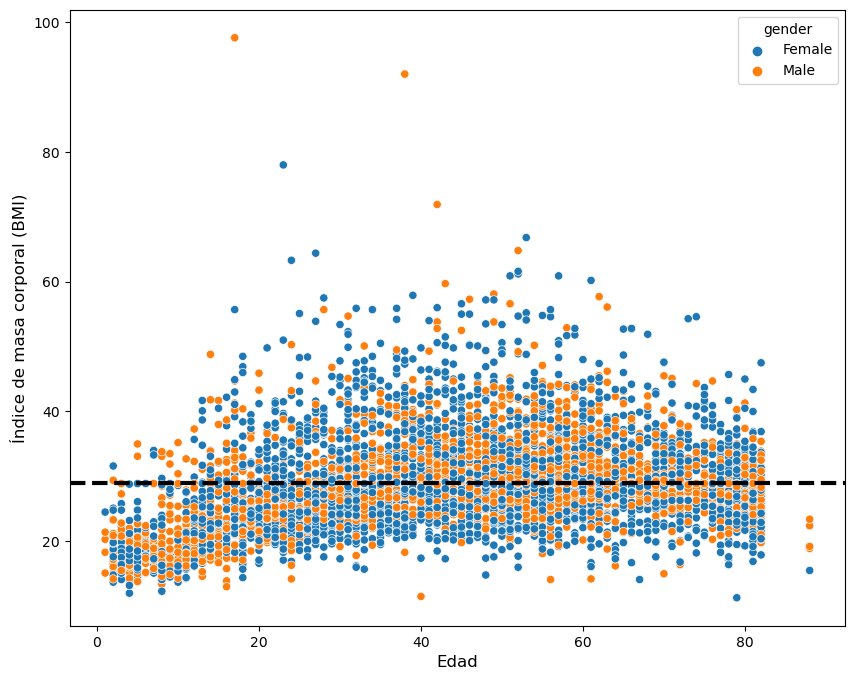

In [20]:
plt.figure(figsize=(10,8))
fig = sns.scatterplot(data=df_derrame, x="age", y="bmi", hue='gender')
fig.axhline(y= df_derrame['bmi'].mean(), 
            linewidth= 3, color='k', linestyle= '--')
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Índice de masa corporal (BMI)', fontsize=12)
plt.show()

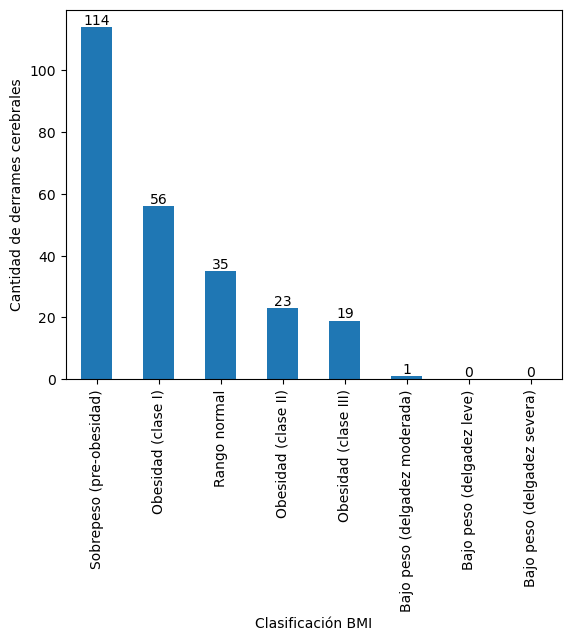

In [21]:
df_derrame_bmi = df_derrame_2.groupby("Clasificación BMI")["stroke"].sum()

df_derrame_bmi = df_derrame_bmi.sort_values(ascending=False)
ax = df_derrame_bmi.plot(kind='bar', xlabel='Clasificación BMI', ylabel='Cantidad de derrames cerebrales')
for i in ax.containers:
    ax.bar_label(i,)


plt.show()

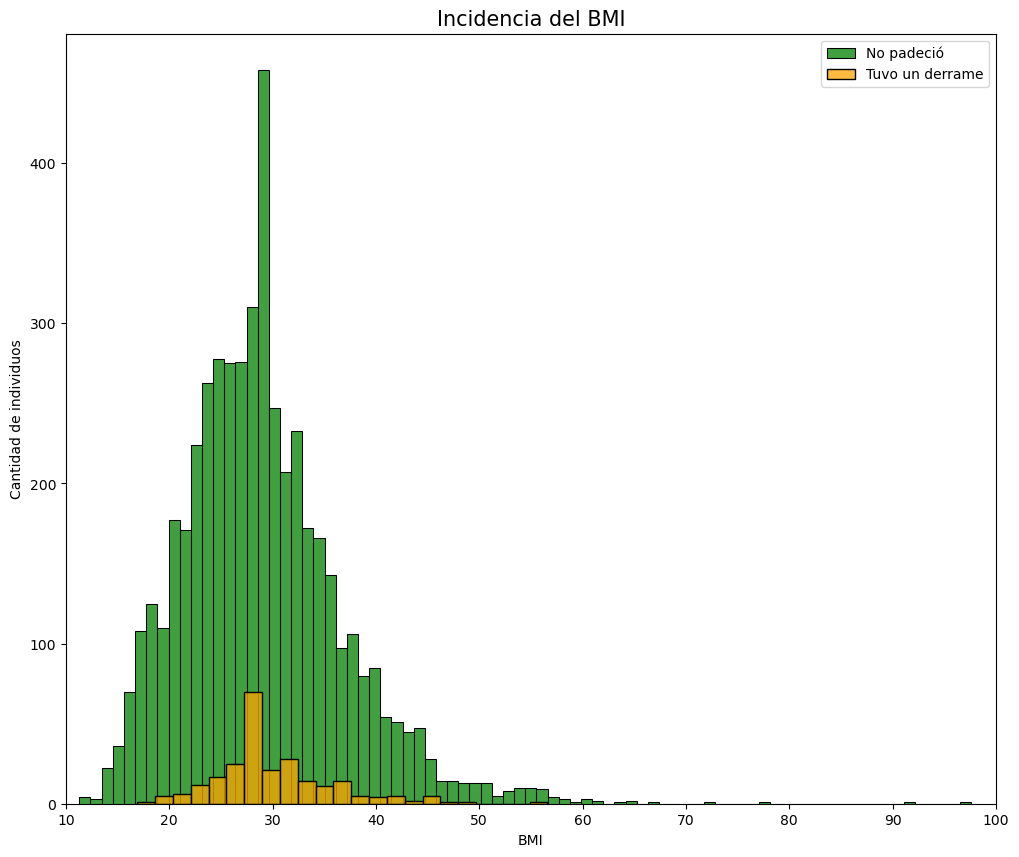

In [22]:
plt.figure(figsize=(12, 10))

sns.histplot(df_derrame[df_derrame['stroke'] == 0]["bmi"], color='green', label='No padeció')
sns.histplot(df_derrame[df_derrame['stroke'] == 1]["bmi"], color='orange', label='Tuvo un derrame')

plt.title('Incidencia del BMI', fontsize=15)
plt.xlabel('BMI')
plt.ylabel('Cantidad de individuos')
plt.xlim([10, 100])

plt.legend()

plt.show()

In [23]:
df_auxiliar_bmi = pd.DataFrame(columns=["Cantidad de personas por categoría", "Cantidad que padeció un derrame cerebral"])

df_contador = df_derrame_2.groupby("Clasificación BMI").size().reset_index(name='Cantidad de personas por categoría')
df_derrame_aux = df_derrame_2.groupby("Clasificación BMI")["stroke"].sum().reset_index(name='Cantidad que padeció un derrame cerebral')


df_auxiliar_bmi = pd.merge(df_contador, df_derrame_aux, on='Clasificación BMI')
df_auxiliar_bmi ["Porcentaje de ocurrencia de un derrame según BMI"] = df_auxiliar_bmi["Cantidad que padeció un derrame cerebral"] / df_auxiliar_bmi["Cantidad de personas por categoría"] * 100

df_auxiliar_bmi = df_auxiliar_bmi.set_index("Clasificación BMI")
df_auxiliar_bmi = df_auxiliar_bmi.sort_values(by=["Porcentaje de ocurrencia de un derrame según BMI"], ascending=False)
df_auxiliar_bmi["Porcentaje de ocurrencia de un derrame según BMI"] = df_auxiliar_bmi["Porcentaje de ocurrencia de un derrame según BMI"].apply(lambda x: "{:.2f}%".format(x))

df_auxiliar_bmi

,Cantidad de personas por categoría,Cantidad que padeció un derrame cerebral,Porcentaje de ocurrencia de un derrame según BMI
Clasificación BMI,,,
Sobrepeso (pre-obesidad),1606,114,7.10%
Obesidad (clase I),1000,56,5.60%
Obesidad (clase III),414,19,4.59%
Obesidad (clase II),506,23,4.55%
Rango normal,1206,35,2.90%
Bajo peso (delgadez moderada),81,1,1.23%
Bajo peso (delgadez leve),158,0,0.00%
Bajo peso (delgadez severa),78,0,0.00%


Por medio de los gráficos y de la tabla, **podemos validar uno de los supuestos** con el que partimos. 
**Las personas con un índice de masa corporal alto tiene un mayor riesgo de sufrir un derrame cerebral.** 


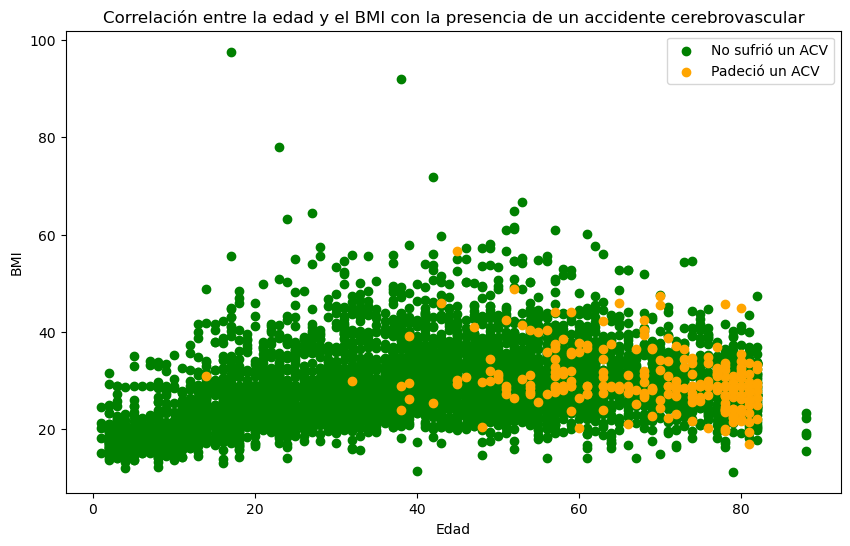

In [24]:
plt.figure(figsize=(10,6))


plt.scatter(df_derrame.age[df_derrame.stroke==0], 
            df_derrame.bmi[df_derrame.stroke==0],
            c="green")

plt.scatter(df_derrame.age[df_derrame.stroke==1], 
            df_derrame.bmi[df_derrame.stroke==1],
            c="orange")

plt.title("Correlación entre la edad y el BMI con la presencia de un accidente cerebrovascular")
plt.xlabel("Edad")
plt.ylabel("BMI")
plt.legend(["No sufrió un ACV", "Padeció un ACV"]);

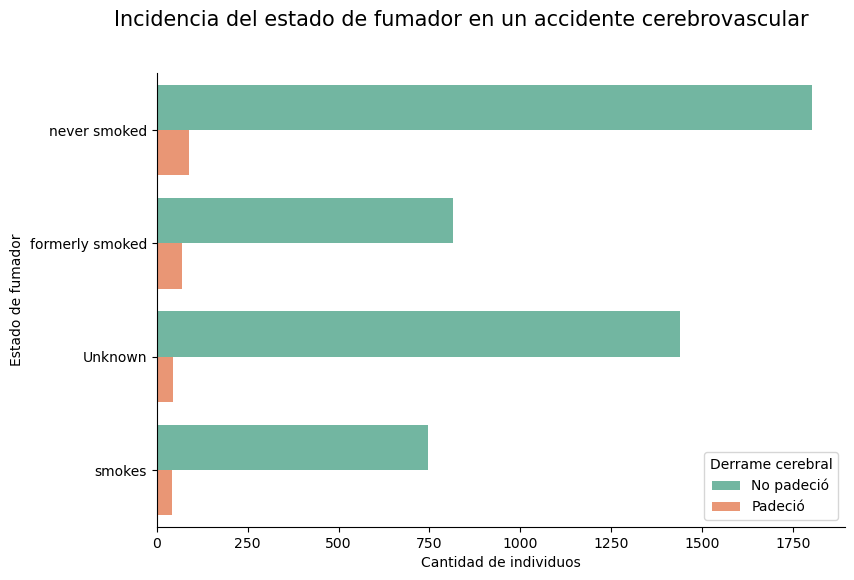

In [25]:
most_stroke_category = df_derrame[df_derrame["stroke"] == 1]["smoking_status"].value_counts().index[0]
ordered_categories = df_derrame.groupby("smoking_status")["stroke"].sum().sort_values(ascending=False).index

g = sns.catplot(
    y="smoking_status",
    hue="stroke",
    kind="count",
    palette="Set2",
    data=df_derrame,
    order=ordered_categories,
    height=6,
    aspect=1.5
)

g.set(xlabel="Cantidad de individuos", ylabel="Estado de fumador")
g.fig.suptitle("Incidencia del estado de fumador en un accidente cerebrovascular", fontsize=15)

plt.legend(title="Derrame cerebral", labels=["No padeció", "Padeció"])
g._legend.remove()

g.tight_layout(pad=2)

plt.show()


Por sorpresa, según evidencia el gráfico, el derrame cerebrovascular no está altamente correlacionado con el status de fumador, ya que es bastante similar la distribución. 

| Status del fumador | Padecieron un derrame | No padecieron derrame |
|-|----------|----------|
| Nunca fumó | 90 | 1802 |
| Desconocido | 46 | 1438 | 
| Ex-fumador | 70 | 814 |
| Fumador | 42 | 747| 


---

A continuación, aplicaré la técnica **"Label Encoding"** con el fin de convertir datos categóricos en valores numéricos. La misma consiste en asignar un valor numérico a c/una de las categorías de una variable categórica, de tal forma que cada categoría se convierte en un número distinto. 

**Las variables categóricas del DataFrame con el cuál se trabaja son:**

* Género (correspondiente a la columna "gender")
* Contrajo matrimonio (correspondiente a la columna "ever_married")
* Tipo de trabajo (correspondiente a la columna "work_type")
* Tipo de residencia (correspondiente a la columna "Residence_type")
* Categoría de fumador (correspondiente a la columna "smoking_status")


In [26]:
le = LabelEncoder()
for column in df_derrame.columns:
    if df_derrame[column].dtype == 'object':
        df_derrame[column] = le.fit_transform(df_derrame[column].astype(str))


df_derrame.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
67,0,17,0,0,0,2,1,92.97,28.893237,1,0
77,0,13,0,0,0,4,0,85.81,18.600000,0,0
84,1,55,0,0,1,2,1,89.17,31.500000,2,0
91,0,42,0,0,0,2,1,98.53,18.500000,2,0
99,0,31,0,0,0,2,1,108.89,52.300000,0,0


### Separación matriz diseño y vector respuesta:

A continuación, extraemos "X" e "y". 
* "X": es la matriz de características, que contiene los valores de todas las características para cada muestra.

<br>

* "y": es el vector objetivo, en este caso, corresponde a la columna "stroke"

In [27]:
X = df_derrame.drop('stroke', axis=1)
y = df_derrame['stroke']

### Aplicar PCA: 

El **PCA es una técnica de reducción de dimensionalidad** que se utiliza para identificar patrones y estructuras en conjuntos de datos de alta dimensionalidad.

Una **componente** es una nueva variable que se crea a partir de una combinación lineal de las variables originales. 

En el PCA, se calculan los componentes principales utilizando una matriz de covarianza o una matriz de correlación de las variables originales. 


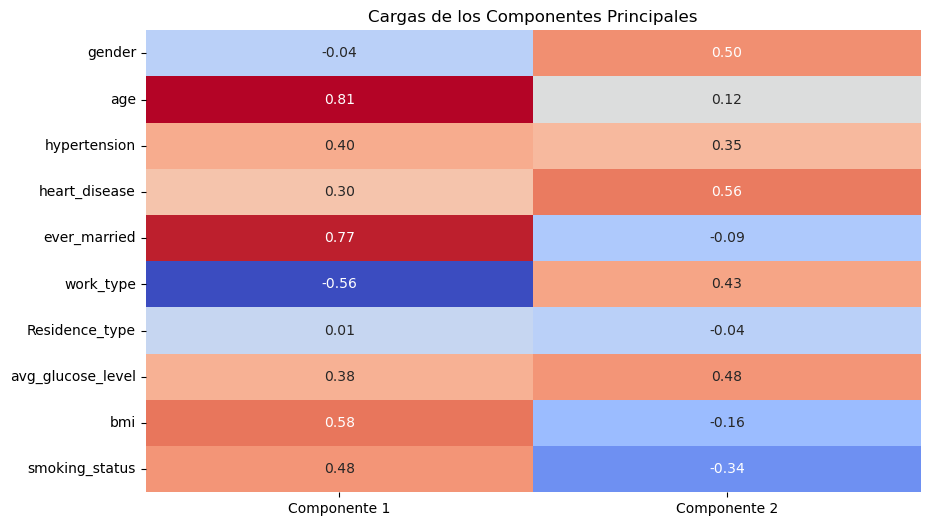

In [28]:
# Normalizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Obtener las cargas de los componentes
cargas_componentes = pca.components_.T * np.sqrt(pca.explained_variance_)

df_componentes = pd.DataFrame(cargas_componentes, columns=['Componente 1', 'Componente 2'], index=X.columns)

plt.figure(figsize=(10, 6))
sns.heatmap(df_componentes, cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title('Cargas de los Componentes Principales')
plt.show()

### Conclusiones a partir de las cargas de los dos primeros componentes principales:

#### Componente 1: Las variables más relevantes en esta componente son:

* **Age** (edad): Tiene una carga alta y positiva en la componente 1, lo que indica una fuerte asociación entre la edad y esta componente. Esto implica que a medida que aumenta la edad, es probable que se refleje en este componente.

* **Ever_married** (estado civil): También tiene una carga alta y positiva en la componente 1. Esto sugiere que el estado civil, especialmente el hecho de estar casado, está relacionado con este componente. Puede haber diferencias en los estilos de vida, responsabilidades o estabilidad económica asociadas con el estado civil que influyen en este componente.

* **Work_type** (tipo de trabajo): Tiene una carga negativa en la componente 1, lo que indica una relación inversa. Esto sugiere que diferentes tipos de trabajo pueden influir en este componente de manera distinta. Es posible que ciertos tipos de trabajo estén asociados con diferentes factores socioeconómicos, estilos de vida u otras características que se reflejan en este componente.

#### Componente 2: Las variables más relevantes en este componente son:

* **Heart_disease** (enfermedad cardíaca): Tiene una carga alta y positiva en el componente 2, lo que indica una asociación fuerte entre la enfermedad cardíaca y este componente.

* **Gender** (género): También tiene una carga positiva, aunque más pequeña que la enfermedad cardíaca, lo que sugiere que el género también está relacionado con este componente.

Estas conclusiones se basan en las cargas de los componentes principales y nos permiten comprender qué variables tienen una mayor influencia en la formación de cada componente.

### Aplicamos la técnica de sobremuestro SMOTE

Al tener un conjunto de datos en el que el 95,09% de las observaciones pertenece a la clase negativa (no ha padecido un derrame cerebral) y el 4,91% restante pertenece a la clase positiva, podemos decir que el conjunto de datos está desequilibrado y que la clase positiva es la clase minoritaria. 

Es por ello, que emplearemos la técnica de sobremuestreo SMOTE para abordar el desequilibrio de clases y mejorar la capacidad del modelo para detectar patrones en la clase minoritaria.

Se crearan nuevas observaciones sintéticas para la clase minoritaria a partir de las observaciones existentes, de forma que el conjunto de datos esté más balanceado y las clases tengan una cantidad de observaciones similares. 

Y es por esto que logré mejorar la capacidad del modelo de clasificación para detectar patrones en la clase positiva (la minoritaria) y aumentar tanto su precisión como recall. 

In [29]:
# Aplicar SMOTE al conjunto de características reducidas por PCA
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_pca, y)


### Train/Test: Dividimos el conjunto de datos.
* De entrenamiento 
* De prueba

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**test_size:** indica el tamaño del conjunto de datos de prueba. En este caso, se utilizó el valor 0.2, lo que significa que el 20% del conjunto de datos se utilizará como conjunto de prueba y el 80% restante se utiliza como conjunto de entrenamiento. 
Se corrobora a continuación con un shape: 

In [31]:
# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)



### Métricas y matriz de confusión para el "Modelo 1":

In [32]:
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Matriz de Confusión:")
print(confusion)

Exactitud: 0.6954711087975013
Precisión: 0.688034188034188
Recall: 0.687299893276414
F1-score: 0.6876668446342765
Matriz de Confusión:
[[692 292]
 [293 644]]


Al analizar estas métricas, podemos concluir que el modelo presenta un **desempeño relativamente bajo en la tarea de clasificación**. 

Además, a partir de las métricas, podemos concluir que el modelo de **regresión logística, en combinación con PCA, no es suficientemente efectivo** para resolver el problema de clasificación en este conjunto de datos. 

Por ello, **exploraremos otras alterarnativas**. Se probaran diferentes algoritmos, técncias de reducción de dimensionalidad y realizar un análisis más exhaustivo del conjunto de datos. 

A continuación, utilizaremos **validación cruzada** para **determinar el número óptimo de componentes en PCA**. Luego, nos enfocaremos en abordar el desequilibrio de clases y procederemos con el entrenamiento y evaluación de un modelo de **árbol de decisión** utilizando métricas de evaluación estándar.

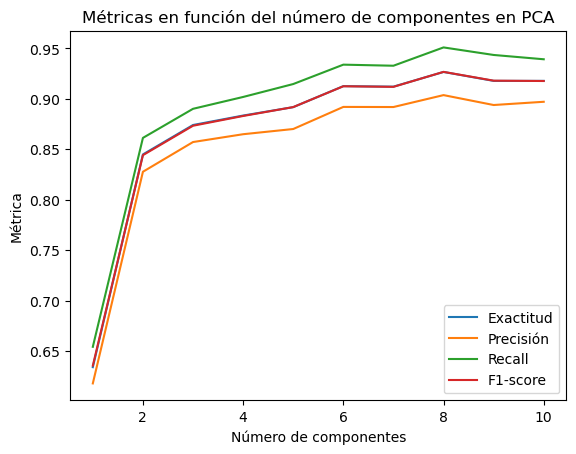

Número óptimo de componentes: 8


In [33]:
# Reducción de dimensionalidad utilizando PCA
pca = PCA()
X_nuevo = pca.fit_transform(X)

# Rango de número de componentes a probar
rango_num_componentes = range(1, X.shape[1]+1)

# Listas para almacenar las métricas
exactitud_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Validación cruzada para cada número de componentes
for num_componentes in rango_num_componentes:
    # Reducción de dimensionalidad con el número de componentes actual
    pca = PCA(n_components=num_componentes)
    X_reducido = pca.fit_transform(X)

    # Aplicación de SMOTE sobre el conjunto de datos reducido
    oversample = SMOTE(random_state=42)
    X_muestreo, y_muestreo = oversample.fit_resample(X_reducido, y)

    # División en conjunto de entrenamiento y prueba
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_muestreo, y_muestreo, test_size=0.20, random_state=42)

    # Entrenamiento del modelo
    arbol_decision = DecisionTreeClassifier(random_state=42)
    arbol_decision.fit(X_entrenamiento, y_entrenamiento)

    # Predicción del modelo
    y_pred = arbol_decision.predict(X_prueba)

    # Cálculo de las métricas
    exactitud_scores.append(accuracy_score(y_prueba, y_pred))
    precision_scores.append(precision_score(y_prueba, y_pred))
    recall_scores.append(recall_score(y_prueba, y_pred))
    f1_scores.append(f1_score(y_prueba, y_pred))

# Gráfica de las métricas en función del número de componentes
plt.plot(rango_num_componentes, exactitud_scores, label='Exactitud')
plt.plot(rango_num_componentes, precision_scores, label='Precisión')
plt.plot(rango_num_componentes, recall_scores, label='Recall')
plt.plot(rango_num_componentes, f1_scores, label='F1-score')
plt.xlabel('Número de componentes')
plt.ylabel('Métrica')
plt.title('Métricas en función del número de componentes en PCA')
plt.legend()
plt.show()

# Selección del número óptimo de componentes
mejor_num_componentes = rango_num_componentes[np.argmax(f1_scores)]
print("Número óptimo de componentes:", mejor_num_componentes)

# Reducción de dimensionalidad con el número óptimo de componentes
pca = PCA(n_components=mejor_num_componentes)
X_reducido = pca.fit_transform(X)

# Aplicación de SMOTE sobre el conjunto de datos reducido
oversample = SMOTE(random_state=42)
X_muestreo, y_muestreo = oversample.fit_resample(X_reducido, y)

# División en conjunto de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_muestreo, y_muestreo, test_size=0.20, random_state=42)

### Modelo de clasificación basado en árboles de decisión:

Un árbol de decisión es un modelo de clasificación que toma decisiones basadas en una serie de preguntas o condiciones que se aplican a los datos de entrada. 

Se construye a partir de un conjunto de datos de entrenamiento definidos anteriormente y se utiliza para clasificar nuevas observaciones en función de características. 

Una vez elaborado, lo utilizaremos para hacer predicciones sobre los datos de prueba. 


In [34]:
arbol_decision = DecisionTreeClassifier(random_state=42)
arbol_decision.fit(X_entrenamiento, y_entrenamiento)

# Predicción del modelo
y_pred = arbol_decision.predict(X_prueba)

### Métricas y matriz de confusión para el "Modelo 2":

In [35]:
# Métricas del modelo con el número óptimo de componentes
print("Exactitud:", accuracy_score(y_prueba, y_pred))
print("Precisión:", precision_score(y_prueba, y_pred))
print("Recall:", recall_score(y_prueba, y_pred))
print("F1-score:", f1_score(y_prueba, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_prueba, y_pred))

Exactitud: 0.9266007287870901
Precisión: 0.9036511156186613
Recall: 0.9509071504802561
F1-score: 0.9266770670826833
Matriz de confusión:
 [[889  95]
 [ 46 891]]


Las métricas obtenidas y la matriz de confusión indican un **rendimiento significativamente mejor en comparación con el modelo anterior**. Esto sugiere que la combinación de **reducción de dimensionalidad con PCA** y el **modelo de clasificación** basado en **árboles de decisión** ha logrado una **mejor capacidad de predicción.**

A partir de la **matriz de confusión**, observamos que **el modelo ha logrado acertar en la mayoría de las instancias de ambas clases**.

---

### Reducción de la dimensionalidad con el método de selección chi-cuadrado:

A continuación, aplicaremos otro **método de selección de características para reducir la dimensionalidad** del conjunto de datos.

Emplearemos el **método de prueba chi-cuadrado.**

In [36]:
selector = SelectKBest(chi2, k=3)
X_new = selector.fit_transform(X, y)

In [37]:
# Aplicación de SMOTE
oversample = SMOTE(random_state=42)
X_new, y = oversample.fit_resample(X_new, y)

In [38]:
# División en conjunto de entrenamiento y prueba
X_train , X_test , y_train , y_test = train_test_split(X_new , y ,test_size = 0.20 , random_state = 42)

In [39]:
# Entrenamiento del modelo
arbol_decision = DecisionTreeClassifier(random_state=42)
arbol_decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Haremos las predicciones sobre el conjunto de prueba utilizando el modelo de clasificación entrenado.
Además, calcularemos varias métricas de evaluación para medir el rendimiento del modelo seleccionado y poder validarlo.

### Métricas y matriz de confusión para el "Modelo 3":

In [40]:
y_pred = arbol_decision.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Exactitud: 0.9307652264445602
Precisión: 0.9213836477987422
Recall: 0.9381003201707577
F1-score: 0.9296668429402433
Matriz de confusión:
 [[909  75]
 [ 58 879]]


* La **precisión** del modelo es del **92,14%**, lo que significa que de todas las predicciones positivas que hizo, el porcentaje mencionado fueron correctas.
* El **recall** del modelo es del **93,81%** lo que significa que el modelo identificó correctamente el 93,81%% de los casos positivos. 
* El **F1-score** es del **92,97%** lo que representa un equilibrio entre la precisión y el recall del modelo. 
* El **modelo clasificó correctamente el 93,08%** de todas las instancias en el conjunto de prueba. En particular, y a partir de la **matriz de confusión**, podemos estar seguros de que el modelo identificó correctamente 909 casos negativos (no ha padecido derrame) y 879 casos positivos (padeció un derrame), mientras que se equivocó en 58 casos positivos y 75 casos negativos. 
* **No parece haber una situación de sobreajuste o subajuste basándonos en las métricas generadas.**

----

### Con K-Fold Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score, KFold

In [42]:
X = df_derrame.drop('stroke', axis=1)
y = df_derrame['stroke']

In [43]:
selector = SelectKBest(chi2, k=3)
X_new = selector.fit_transform(X, y)


oversample = SMOTE(random_state=42)
X_new, y = oversample.fit_resample(X_new, y)


arbol_decision = DecisionTreeClassifier(random_state=42)


In [44]:
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)


In [45]:
accuracy_scores = cross_val_score(arbol_decision, X_new, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(arbol_decision, X_new, y, cv=kf, scoring='precision')
recall_scores = cross_val_score(arbol_decision, X_new, y, cv=kf, scoring='recall')
f1_scores = cross_val_score(arbol_decision, X_new, y, cv=kf, scoring='f1')
confusion = confusion_matrix(y_test, y_pred)

### Métricas y matriz de confusión para el "Modelo 4":

In [46]:
print("Matriz de confusión:")
print(confusion)
print("Exactitud:", accuracy_scores.mean())
print("Precisión:", precision_scores.mean())
print("Recall:", recall_scores.mean())
print("F1-score:", f1_scores.mean())

Matriz de confusión:
[[909  75]
 [ 58 879]]
Exactitud: 0.9242854741454103
Precisión: 0.9207203159836771
Recall: 0.9285197464321492
F1-score: 0.9245553876436201


|                            | Modelo con Cross Validation ("Modelo 4") | Modelo sin Cross Validation ("Modelo 3")|
|----------------------------|----------------------------|----------------------------|
| Exactitud                  | 0.9242854741454103         | 0.9307652264445602         |
| Precisión                  | 0.9207203159836771         | 0.9213836477987422         |
| Recall                     | 0.9285197464321492         | 0.9381003201707577         |
| F1-score                   | 0.9245553876436201         | 0.9296668429402433         |


En general, aunque ambos modelos tienen un rendimiento bastante similar, el modelo sin Cross Validation muestra un rendimiento ligeramente mejor

---

A continuación, utilizamos la métrica F1-score como medida para **determinar el valor óptimo de K** en el algoritmo de selección de características **chi-cuadrado**. 

#### Recordatorio:
* La métrica F1-score es una medida de la precisión y exhaustividad combinadas. 

Para abordar el desequilibrio de clases en el conjunto de datos, aplicamos la **técnica de sobremuestreo SMOTE**. Posterior a ello, procedimos a entrenar y evaluar un **modelo de árbol de decisión**. 

**Observación:** 
Dicho modelo será el que seleccionaremos al arrojar el mejor performance

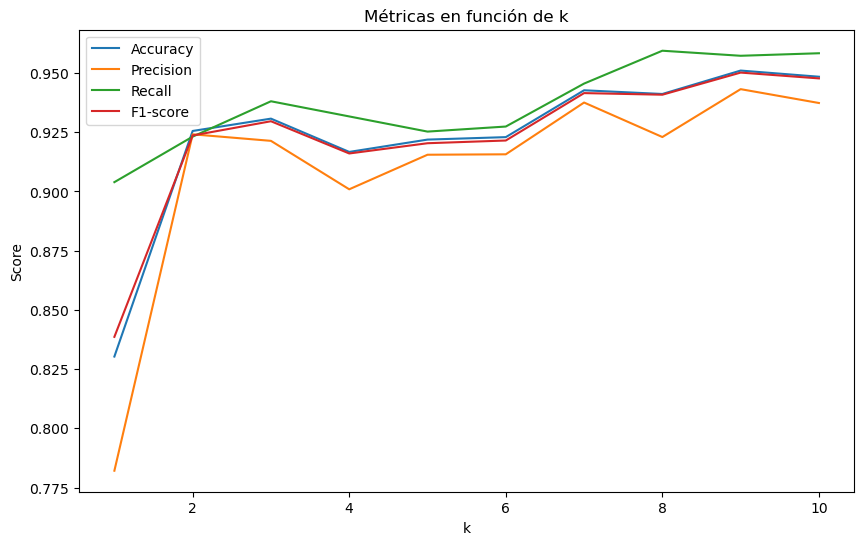

Mejor valor de k: 9


In [47]:
# Separación matriz diseño y vector respuesta
X = df_derrame.drop('stroke', axis=1)
y = df_derrame['stroke']

# Definir el rango de valores de k basado en el número de características
k_values = range(1, X.shape[1]+1)

# Diccionario para almacenar los resultados de rendimiento para cada valor de k
performance_results = {'k': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

for k in k_values:
    selector = SelectKBest(chi2, k=k)
    X_new = selector.fit_transform(X, y)

    # Aplicación de SMOTE
    oversample = SMOTE(random_state=42)
    X_new_resampled, y_resampled = oversample.fit_resample(X_new, y)

    # División en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_new_resampled, y_resampled, test_size=0.20, random_state=42)

    # Entrenamiento del modelo
    arbol_decision = DecisionTreeClassifier(random_state=42)
    arbol_decision.fit(X_train, y_train)

    y_pred = arbol_decision.predict(X_test)

    # Cálculo de métricas de rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Almacenar las métricas para el valor de k actual
    performance_results['k'].append(k)
    performance_results['accuracy'].append(accuracy)
    performance_results['precision'].append(precision)
    performance_results['recall'].append(recall)
    performance_results['f1_score'].append(f1)

# Encontrar el mejor valor de k basado en el F1-score
best_k_index = np.argmax(performance_results['f1_score'])
best_k = performance_results['k'][best_k_index]
best_metrics = {
    'accuracy': performance_results['accuracy'][best_k_index],
    'precision': performance_results['precision'][best_k_index],
    'recall': performance_results['recall'][best_k_index],
    'f1_score': performance_results['f1_score'][best_k_index]
}


# Gráfico de métricas en función de k
plt.figure(figsize=(10, 6))
plt.plot(performance_results['k'], performance_results['accuracy'], label='Accuracy')
plt.plot(performance_results['k'], performance_results['precision'], label='Precision')
plt.plot(performance_results['k'], performance_results['recall'], label='Recall')
plt.plot(performance_results['k'], performance_results['f1_score'], label='F1-score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Métricas en función de k')
plt.legend()
plt.show()
print("Mejor valor de k:", best_k)

### Métricas y matriz de confusión para el "Modelo 5":

In [48]:
print("Accuracy:", best_metrics['accuracy'])
print("Precision:", best_metrics['precision'])
print("Recall:", best_metrics['recall'])
print("F1-score:", best_metrics['f1_score'])
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9510671525247267
Precision: 0.943217665615142
Recall: 0.9573105656350054
F1-score: 0.9502118644067796
Matriz de confusión:
 [[924  60]
 [ 39 898]]


Las métricas obtenidas y la matriz de confusión indican un **rendimiento muy sólido** del modelo de clasificación basado en **árboles de decisión** después de aplicar la reducción de dimensionalidad con el método **chi cuadrado**.

Observamos que el modelo ha logrado acertar en la mayoría de las instancias de ambas clases. Por lo tanto, estamos en condiciones de afirmar que **el modelo es capaz de discriminar efectivamente entre las clases y realizar predicciones precisas** en este conjunto de datos.

## Aplicando técnica de optimización de hiperparámetros: GridSearch

In [49]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros y sus rangos de valores a probar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo del árbol de decisión
arbol_decision = DecisionTreeClassifier(random_state=42)

# Realizar la búsqueda en cuadrícula con validación cruzada (K-Fold Cross Validation)
grid_search = GridSearchCV(arbol_decision, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

### Métricas y matriz de confusión para el "Modelo 6":

In [50]:
print("Mejores hiperparámetros:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.9510671525247267
Precision: 0.9527389903329753
Recall: 0.9466382070437567
F1-score: 0.949678800856531
Matriz de Confusión:
[[940  44]
 [ 50 887]]


Si se busca maximizar la precisión para reducir los falsos positivos, entonces el modelo en que aplicamos la técnica de optimización GridSearch podría ser preferible. En este caso, los falsos positivos son bajos (44), pero tiene un mayor número de falsos negativos (50) respecto al modelo previo ("Modelo 5")

De acuerdo con el caso de estudio, es preferible tener menos falsos negativos que menos falsos positivos. Es decir, se prioriza reducir los casos en los que el modelo clasifica erróneamente a un paciente sano como no en riesgo de sufrir un derrame cerebral (falso negativo). Por ello, nos inclinamos por el modelo previo.

---

### Con K-Fold Cross Validation 

In [51]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

# Separación matriz diseño y vector respuesta
X = df_derrame.drop('stroke', axis=1)
y = df_derrame['stroke']

# Definir el rango de valores de k basado en el número de características
k_values = range(1, X.shape[1]+1)

# Diccionario para almacenar los resultados de rendimiento para cada valor de k
performance_results = {'k': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

# Definir el número de folds para K-Fold Cross Validation
n_splits = 5

# Crear el objeto KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterar sobre cada valor de k
for k in k_values:
    selector = SelectKBest(chi2, k=k)
    X_new = selector.fit_transform(X, y)

    # Aplicación de SMOTE
    oversample = SMOTE(random_state=42)
    X_new_resampled, y_resampled = oversample.fit_resample(X_new, y)

    fold_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

    # Iterar sobre los folds de K-Fold Cross Validation
    for train_index, test_index in kf.split(X_new_resampled):
        X_train, X_test = X_new_resampled[train_index], X_new_resampled[test_index]
        y_train, y_test = y_resampled[train_index], y_resampled[test_index]

        # Entrenamiento del modelo
        arbol_decision = DecisionTreeClassifier(random_state=42)
        arbol_decision.fit(X_train, y_train)

        y_pred = arbol_decision.predict(X_test)

        # Cálculo de métricas de rendimiento para el fold actual
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Almacenar las métricas para el fold actual
        fold_metrics['accuracy'].append(accuracy)
        fold_metrics['precision'].append(precision)
        fold_metrics['recall'].append(recall)
        fold_metrics['f1_score'].append(f1)

    # Cálculo del promedio de las métricas de rendimiento para todos los folds
    avg_metrics = {
        'accuracy': np.mean(fold_metrics['accuracy']),
        'precision': np.mean(fold_metrics['precision']),
        'recall': np.mean(fold_metrics['recall']),
        'f1_score': np.mean(fold_metrics['f1_score'])
    }

    # Almacenar los resultados de rendimiento para el valor de k actual
    performance_results['k'].append(k)
    performance_results['accuracy'].append(avg_metrics['accuracy'])
    performance_results['precision'].append(avg_metrics['precision'])
    performance_results['recall'].append(avg_metrics['recall'])
    performance_results['f1_score'].append(avg_metrics['f1_score'])

# Encontrar el mejor valor de k basado en el F1-score
best_k_index = np.argmax(performance_results['f1_score'])
best_k = performance_results['k'][best_k_index]
best_metrics = {
    'accuracy': performance_results['accuracy'][best_k_index],
    'precision': performance_results['precision'][best_k_index],
    'recall': performance_results['recall'][best_k_index],
    'f1_score': performance_results['f1_score'][best_k_index]
}


### Métricas y matriz de confusión para el "Modelo 7":

In [52]:
# Imprimir el mejor valor de k y sus métricas asociadas
print("Mejor valor de k:", best_k)
print("Accuracy:", best_metrics['accuracy'])
print("Precision:", best_metrics['precision'])
print("Recall:", best_metrics['recall'])
print("F1-score:", best_metrics['f1_score'])
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Mejor valor de k: 10
Accuracy: 0.9460531081901786
Precision: 0.9408056067961219
Recall: 0.9520804503926545
F1-score: 0.9463920265494353
Matriz de confusión:
 [[914  48]
 [ 50 908]]


|                            | Modelo con K-Fold Cross Validation ("Modelo 7") | Modelo sin K-Fold Cross Validation ("Modelo 5") |
|----------------------------|------------------------------------|-----------------------------------|
| Mejor valor de k           | 10                                  | 9                                 |
| Accuracy                   | 0.9460531081901786                             | 0.9510671525247267                            |
| Precision                  | 0.9408056067961219                             | 0.943217665615142                         |
| Recall                     | 0.9520804503926545                           | 0.9573105656350054                           |
| F1-score                   | 0.9463920265494353                            | 0.9502118644067796                           |


Al **comparar los dos modelos** (M5 y M7), podemos observar lo siguiente:

* El modelo con K-Fold Cross Validation utilizó un valor de k igual a 10, mientras que el modelo sin K-Fold Cross Validation utilizó un valor de k igual a 9. Esto indica que **se seleccionaron diferentes conjuntos de características para cada modelo**.

* En cuanto a las métricas de evaluación, ambos modelos obtuvieron **resultados similares**. Sin embargo, el modelo **sin K-Fold Cross Validation parece tener un ligero mejor desempeño** en términos de precisión y recall.

**Comparando las dos matrices de confusión**:

* Modelo sin K-Fold Cross Validation ("Modelo 5"):

|                  | Predicción Negativa | Predicción Positiva |
|------------------|---------------------|---------------------|
| Real Negativa    | 924                 | 60                  |
| Real Positiva    | 39                  | 898                 |


* Modelo con K-Fold Cross Validation ("Modelo 7"): 

|                  | Predicción Negativa | Predicción Positiva |
|------------------|---------------------|---------------------|
| Real Negativa    | 914                 | 48                  |
| Real Positiva    | 50                  | 908                 |


Podemos observar que en ambos casos **los valores en la diagonal principal son altos, lo que indica una buena capacidad de clasificación para ambas situaciones**.

Sin embargo, si consideramos el equilibrio entre falsos positivos y falsos negativos, podemos notar que el modelo sin cross validation tiene menos falsos positivos (60) en comparación con el modelo con cross validation (48). Por otro lado, el modelo con cross validation tiene menos falsos negativos (50) en comparación con el modelo sin cross validation (39).

En general, ambos modelos muestran un buen rendimiento en la clasificación, pero si debemos tomar una decisión basada únicamente en la matriz de confusión, podríamos considerar que **el modelo sin cross validation es ligeramente mejor debido a su menor número de falsos positivos**.

Existen varias razones por las cuales se puede observar una diferencia en el rendimiento entre el modelo con K-Fold Cross Validation y el modelo sin K-Fold Cross Validation:

1. Selección de características: Ambos modelos utilizan una técnica de selección de características, en este caso, SelectKBest con chi-cuadrado. Como se menciono previamente, el modelo sin K-Fold Cross Validation selecciona un valor de k igual a 9, mientras que el modelo con K-Fold Cross Validation selecciona un valor de k igual a 10. Esto significa que los conjuntos de características utilizados en cada modelo son ligeramente diferentes, lo que puede influir en el rendimiento de la clasificación.


2. Variabilidad de los datos: El uso de K-Fold Cross Validation permite tener una mejor estimación del rendimiento del modelo al considerar múltiples divisiones de los datos en conjuntos de entrenamiento y prueba. Esto ayuda a mitigar el impacto de la variabilidad en los datos y proporciona una evaluación más robusta del modelo. En el modelo sin K-Fold Cross Validation, al no realizar esta validación cruzada, es posible que se esté obteniendo una estimación del rendimiento más sesgada debido a la variabilidad específica de los datos utilizados en ese entrenamiento y prueba específicos.


3. Tamaño del conjunto de datos: El rendimiento de los modelos de aprendizaje automático puede verse afectado por el tamaño del conjunto de datos. Si el conjunto de datos es pequeño, el modelo puede tener dificultades para generalizar y obtener un buen rendimiento. El uso de K-Fold Cross Validation ayuda a mitigar este problema al utilizar múltiples divisiones de los datos y promediar los resultados. 

## Elección final del modelo:


El **modelo con el mejor rendimiento** general parece ser el de **clasificación basado en árboles de decisión tras aplicar la reducción de dimensionalidad con el método chi cuadrado donde utilizamos la métrica F1-score como medida para determinar el valor óptimo de K sin K-Fold Cross Validation y aplicando sobremuestreo SMOTE** (**"Modelo 5"**) debido a que tiene la **mayor exactitud, recall y F1-score** entre todos los modelos evaluados. 

Además, al observar la **matriz de confusión**, se puede ver que dicho modelo tiene un **número relativamente bajo de falsos positivos y falsos negativos en comparación con los otros modelos**. Esto indica que el modelo tiene una **capacidad sólida para clasificar correctamente la mayoría de las instancias y mantener un equilibrio entre precisión y capacidad de recuperación**. **Es el modelo con el cuál se obtuvo la menor cantidad de falsos negativos.**

A continuación, se dejan expresadas las métricas obtenidas y la matriz de confusión.

* **Accuracy:** 0.9510671525247267

<br>

* **Precision:** 0.943217665615142

<br>

* **Recall:** 0.9573105656350054

<br>

* **F1-score:** 0.9502118644067796

<br>

* **Matriz de confusión:**

|                  | Predicción Negativa | Predicción Positiva |
|------------------|---------------------|---------------------|
| Real Negativa    | 924                 | 60                  |
| Real Positiva    | 39                  | 898                 |